### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer


### Loading Dataset

In [2]:
# program to use cross_val_score
iris = load_breast_cancer()
X, y = iris.data, iris.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [3]:
np.unique(y_train)

array([0, 1])

### Model Training

##### Model 1 - Logistic Regress

In [4]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Classifier object
lr_classifier = LogisticRegression()

# Fit the classifier to the training data
lr_classifier.fit(X_train, y_train)

y_pred1 = lr_classifier.predict_proba(X_test)[:, 1]



/home/yash/.local/share/anaconda3/envs/python_dev/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Model 2 - Random Forest Classifier

In [12]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred2 = rf_classifier.predict_proba(X_test)[:, 1]

### Plotting AUC_ROC Curve

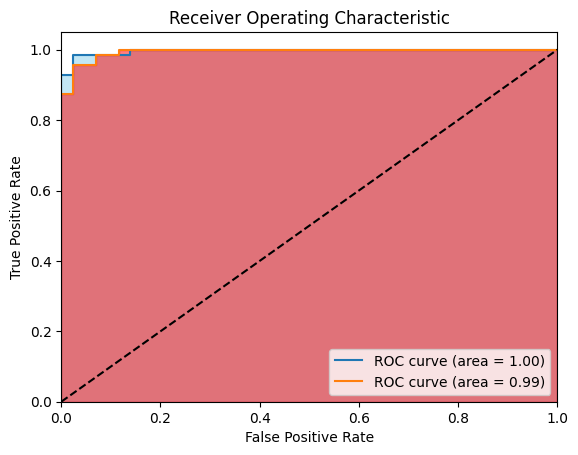

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

# code to plot ROC curve
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred2)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)

# Plot the ROC curve

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.5)
plt.fill_between(fpr2, tpr2, color='red', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


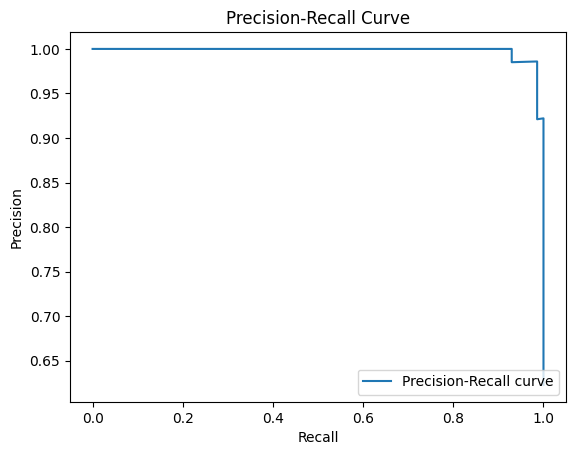

In [6]:
# code to perform precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

### Testing

In [20]:
from sklearn.ensemble import RandomForestClassifier

# importing all folding methods
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, LeavePOut, ShuffleSplit

estimator = RandomForestClassifier(n_estimators=10, max_depth=5) 

# cross_val_score on iris dataset
from sklearn.model_selection import cross_val_score

# using Strafified KFold
# Perform cross-validation using StratifiedKFold on the iris dataset
from sklearn.model_selection import cross_val_score, StratifiedKFold

# # Create a StratifiedKFold object with 5 folds
# skf = StratifiedKFold(n_splits=5)
# loo = LeaveOneOut()
lpo = LeavePOut()

# # Initialize a list to store the cross-validation scores
# scores = []

# # Iterate over the folds and perform cross-validation
# for train_index, test_index in skf.split(X_train, y_train):
#     # Split the data into training and testing sets
#     X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
#     y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
#     # Fit the classifier to the training data
#     estimator.fit(X_train_fold, y_train_fold)
    
#     # Predict the labels for the test data
#     y_pred_fold = estimator.predict(X_test_fold)
    
#     # Calculate the accuracy score for the fold
#     score = accuracy_score(y_test_fold, y_pred_fold)
    
#     # Append the score to the list of scores
#     scores.append(score)

# Print the cross-validation scores
# print("Cross-Validation Scores:", scores)
# Perform cross-validation on the iris dataset
scores = cross_val_score(estimator, X_train, y_train, cv=lpo)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.externals import joblib  # For model saving (you can use 'joblib' or 'pickle')

# Load your dataset (X, y)

# Define the model (in this case, a RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

# Define cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate metrics
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(model, X, y, cv=cv, scoring='recall')
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

accuracy_scores = cross_val_score(model2, X, y, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(model2, X, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(model2, X, y, cv=cv, scoring='recall')
f1_scores = cross_val_score(model2, X, y, cv=cv, scoring='f1')

# Display mean and standard deviation of metrics
print("Mean Accuracy: {:.2f} (+/- {:.2f})".format(np.mean(accuracy_scores), np.std(accuracy_scores)))
print("Mean Precision: {:.2f} (+/- {:.2f})".format(np.mean(precision_scores), np.std(precision_scores)))
print("Mean Recall: {:.2f} (+/- {:.2f})".format(np.mean(recall_scores), np.std(recall_scores)))
print("Mean F1 Score: {:.2f} (+/- {:.2f})".format(np.mean(f1_scores), np.std(f1_scores)))

# Identify the best model based on a chosen metric (e.g., accuracy)
best_model_index = np.argmax(accuracy_scores)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X, y)

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')


In [19]:
scores.shape, X_train.shape

((120,), (120, 4))

##### Pipeline Implementation

In [7]:
# building complete sklearn.pipeline for iris dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load your dataset (X, y)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('pca', PCA(n_components=2)),  # Step 2: Perform dimensionality reduction
    ('classifier', LogisticRegression())  # Step 3: Train the classifier
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)


# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Print the cross-validation scores
print(scores)

# Use the pipeline to make predictions
# scores = pipeline.score(X_test, y_test)

[0.95833333 0.95833333 0.875      0.95833333 0.83333333]


In [ ]:
# using selectKBest for feature selecting using chi2, f_classif, f_regression (ANOVA), mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, f_regression, mutual_info_regression

# Create an instance of SelectKBest with k=2
selector = SelectKBest(score_func=chi2, k=2)

# Fit the selector to the data
selector.fit(X_train, y_train)

# Transform the data to select the k best features
X_train_selected = selector.transform(X_train)

# Print the shape of the selected features
print(X_train_selected.shape)